Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



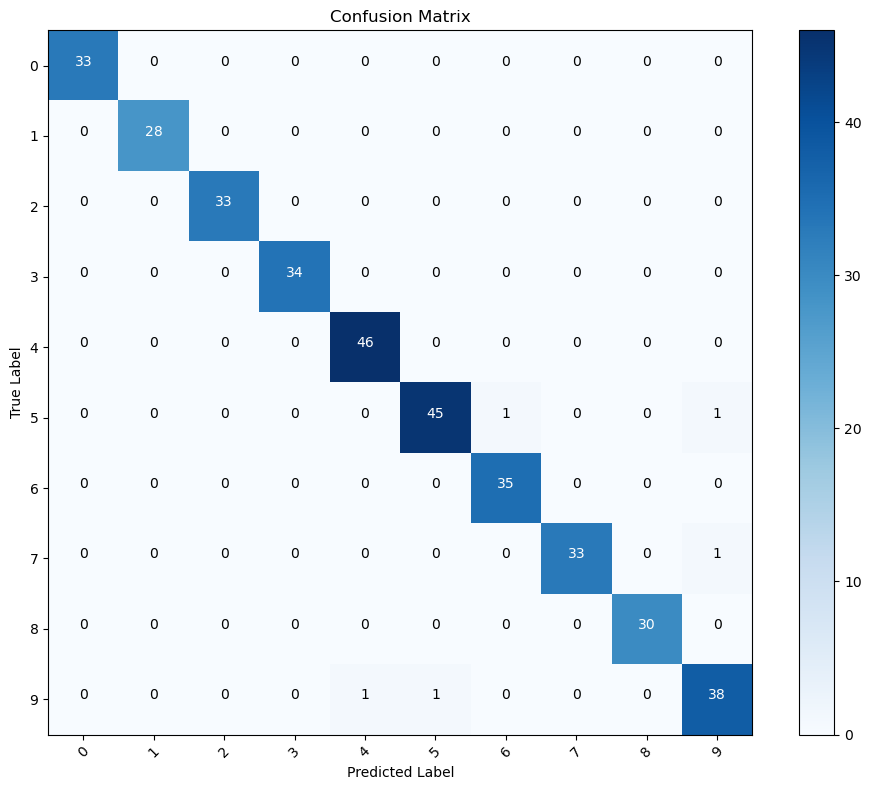

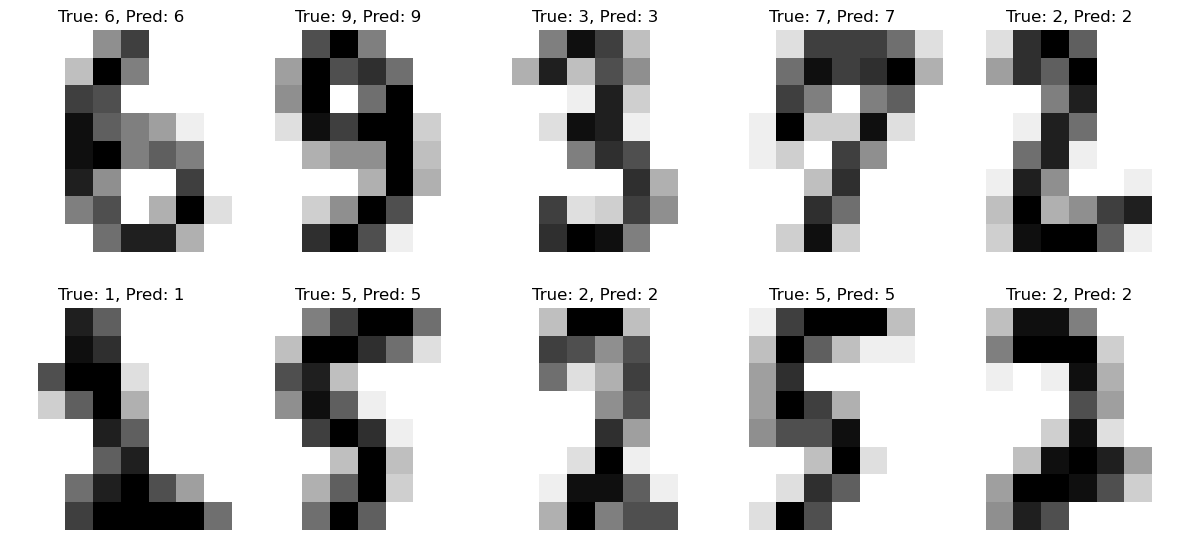

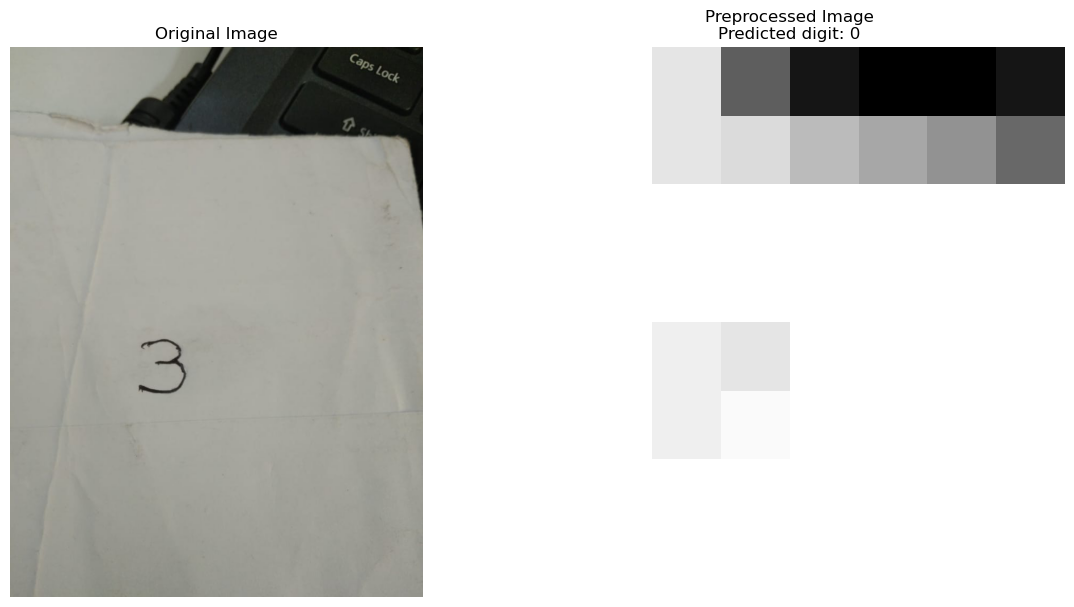

The predicted digit is: 0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
import cv2

# Load the MNIST dataset
digits = load_digits()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, digits.target_names, rotation=45)
plt.yticks(tick_marks, digits.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add text annotations to the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Display some example predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Specify the path to your test image
test_image_path = r'C:\Users\aryah\Downloads\hand1.jpg'

# Load the original image
original_img = Image.open(test_image_path)

# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis('off')

# Preprocess the image
img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))  # Resize to 28x28 first
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA)  # Then resize to 8x8
img_array = img.astype('float32') / 255.0
processed_img = img_array.reshape(1, -1)

# Make a prediction
prediction = knn.predict(processed_img)

# Display the preprocessed image
plt.subplot(1, 2, 2)
plt.imshow(processed_img.reshape(8, 8), cmap='binary')
plt.title(f"Preprocessed Image\nPredicted digit: {prediction[0]}")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"The predicted digit is: {prediction[0]}")